## Drone Graph


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import math

In [118]:
def Create_locations(x,y,n):
    locations= []
    for i in range(n):
        loc_x = random.randint(int(0), int(x))
        loc_y = random.randint(int(0), int(y))
        locations.append([loc_x,loc_y])
    return locations

Create_locations(10,10,5)


[[5, 8], [6, 5], [3, 5], [5, 0], [0, 9]]

In [119]:
def calculate_euclidean_distance(point1, point2):
    
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def calculate_manhattan_distance(point1, point2):
    
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def calculate_total_distance(DP_candidate, delivery_locations, k):
    total_euclidean_distance = 0
    total_manhattan_distance = 0
    if DP_candidate[1]<=k:
        for delivery_location in delivery_locations:
            if delivery_location[1] <= k:
                total_euclidean_distance += calculate_euclidean_distance(DP_candidate, delivery_location)
            else:
                total_euclidean_distance += calculate_euclidean_distance(DP_candidate, (k,delivery_location[0]))
                total_manhattan_distance += calculate_manhattan_distance((k,delivery_location[0]), delivery_location)

    
    else:
        for delivery_location in delivery_locations:
            if delivery_location[1] > k:
                total_manhattan_distance += calculate_manhattan_distance(DP_candidate, delivery_location)
            else:
                total_manhattan_distance += calculate_manhattan_distance(DP_candidate, (k,delivery_location[0]))
                total_euclidean_distance += calculate_euclidean_distance((k, delivery_location[0]), delivery_location)
    
    
    return total_euclidean_distance + total_manhattan_distance


In [120]:
def exhaustive_search(delivery_locations, k, x, y):
    euclidean_count = sum(1 for loc in delivery_locations if loc[1] <= k)
    manhattan_count = len(delivery_locations) - euclidean_count
    
    if euclidean_count > manhattan_count:  # Majority in Euclidean region
        start_y = 1
        end_y = min(y, k)
    else:  # Majority in Manhattan region
        start_y = k + 1
        end_y = y
    
    min_distance = float('inf')
    optimal_DP = None

    for DP_candidate in itertools.product(range(1, x + 1), range(start_y, end_y + 1)):
        total_distance = calculate_total_distance(DP_candidate, delivery_locations, k)
        
        if total_distance < min_distance:
            min_distance = total_distance
            optimal_DP = DP_candidate
    
    print('Optimal DP:', optimal_DP)
    
    return optimal_DP, 2*min_distance


In [121]:
def gec(coordinates):
    x_sum = sum(loc[0] for loc in coordinates)
    y_sum = sum(loc[1] for loc in coordinates)
    x_cord = x_sum / len(coordinates)
    y_cord = y_sum / len(coordinates)

    return x_cord, y_cord

def gmm(coordinate):
    x_axis = []
    y_axis = []
    centroid = []

    for i in coordinate:
        x_axis.append(i[0])
        y_axis.append(i[1])

    centroid.append(np.median(x_axis))
    centroid.append(np.median(y_axis))

    return centroid[0],centroid[1]
def ecmb(coordinate, border):
    longitude = 0
    latitude = 0
    k=border
    test = gec(coordinate)
    for loc in coordinate:
        if loc[1] <= k:
            longitude+= loc[1]
        else:
            longitude+= k
        latitude+= loc[0]
    y_axis = longitude/len(coordinate)
    x_axis = latitude/len(coordinate)
    return x_axis, y_axis

def calculate_manhattan_median(customers):
    # Extract coordinates of customer locations
    coordinates = [(x, y) for x, y in customers]

    # Calculate median coordinates for rows and columns
    median_row = sorted([x for x, y in coordinates])[len(coordinates) // 2]
    median_column = sorted([y for x, y in coordinates])[len(coordinates) // 2]

    return median_row, median_column


# import math
# import numpy as np

def mmeb(customer_locations, border_position):
    R = border_position  

    euclidean_locations = [(x, y) for x, y in customer_locations if y <= border_position]
    manhattan_locations = [(x, y) for x, y in customer_locations if y > border_position]

    best_median_row = None
    best_median_column = None
    best_total_cost = math.inf

    possible_positions = np.linspace(1,6, 6)

    # Iterate over possible distinct positions on the border
    for i in possible_positions:

        projected_euclidean = [(i, border_position) for _, _ in euclidean_locations]

        combined_customers = projected_euclidean + manhattan_locations

        median_row, median_column = calculate_manhattan_median(combined_customers)

        total_cost = sum(math.sqrt((x-i)**2 + (y-border_position)**2) for x,y in euclidean_locations) #cost from euclidian to border
        total_cost += sum(abs(x-median_row) + abs(y-median_column) for x,y in combined_customers) #cost from border to manhattan
        if total_cost < best_total_cost:
            best_total_cost = total_cost
            best_median_row = median_row
            best_median_column = median_column

    return best_median_row, best_median_column

# majority_manhattan_dp = mmeb(loc, k)
# print('Majority Manhattan DP:', majority_manhattan_dp)
# print(2*calculate_total_distance(majority_manhattan_dp, loc, k)/dist)






In [122]:
x=6
y=10
k=4
n=5
# loc = Create_locations(x,y,n)
loc =[[2,3],[4,2], [4,7], [6,10],[3,3]]
# loc =[[3,2],[2,4],[7,4],[10,6],[3,3]]
# dist = calculate_total_distance([3,3], loc, k)
dp,dist = exhaustive_search(loc, k, x,y)

print(dist)
print(dp)
# initial_dp

Optimal DP: (3, 3)
31.98140956982914
(3, 3)


In [128]:
Full_euclidean_dp = gec(loc)
Full_manhattan_dp = gmm(loc)
Majority_euclidean_dp = ecmb(loc, k)
majority_manhattan_dp = mmeb(loc, k)

print('Full Euclidean DP:', Full_euclidean_dp)
print('Full Manhattan DP:', Full_manhattan_dp)
print('Majority Euclidean DP:', Majority_euclidean_dp)
print('Majority Manhattan DP:', majority_manhattan_dp)
print(2*calculate_total_distance(Full_euclidean_dp, loc, k))
print(2*calculate_total_distance(Full_manhattan_dp, loc, k))
print(2*calculate_total_distance(Majority_euclidean_dp, loc, k))
print(2*calculate_total_distance(majority_manhattan_dp, loc, k))
print(2*calculate_total_distance((Full_euclidean_dp), loc, k)/dist)
print(2*calculate_total_distance(Full_manhattan_dp, loc, k)/dist)
print(2*calculate_total_distance((Majority_euclidean_dp), loc, k)/dist)

# majority_manhattan_dp = mmeb(loc, k)

print(2*calculate_total_distance(majority_manhattan_dp, loc, k)/dist)


Full Euclidean DP: (3.8, 5.0)
Full Manhattan DP: (4.0, 3.0)
Majority Euclidean DP: (3.8, 3.2)
Majority Manhattan DP: (4.0, 4)
42.47213595499958
34.0
32.96801110691566
33.30056307974577
1.3280257664148505
1.0631176191832137
1.0308492199173507
1.0412475099646985


Optimal DP: (17, 6)
Optimal DP: (27, 29)
Optimal DP: (12, 33)
Optimal DP: (16, 24)
Optimal DP: (13, 27)
Optimal DP: (16, 32)


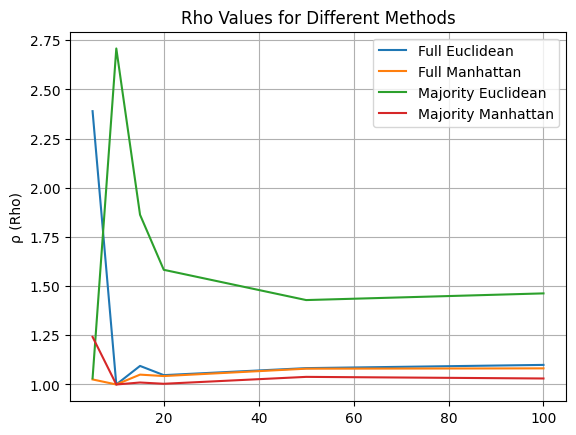

In [159]:
x = 50
y = 50
k = 12
n_values = [5, 10, 15, 20,50 ,100]

# Initialize lists to store rho values for each method
rho_full_eucli_values = []
rho_full_manh_values = []
rho_major_eucli_values = []
rho_major_manh_values = []

# Loop through each n value
for n in n_values:
    # Create the locations
    loc = Create_locations(x, y, n)
    
    # Perform exhaustive search and calculate rho values
    dp, dist = exhaustive_search(loc, k, x, y)
    Full_euclidean_dp = gec(loc)
    Full_manhattan_dp = gmm(loc)
    Majority_euclidean_dp = ecmb(loc, k)
    majority_manhattan_dp = mmeb(loc, k)
    
    rho_full_eucli = 2 * calculate_total_distance(Full_euclidean_dp, loc, k) / dist
    rho_full_manh = 2 * calculate_total_distance(Full_manhattan_dp, loc, k) / dist
    rho_major_eucli = 2 * calculate_total_distance(Majority_euclidean_dp, loc, k) / dist
    rho_major_manh = 2 * calculate_total_distance(majority_manhattan_dp, loc, k) / dist
    
    # Append rho values to the lists
    rho_full_eucli_values.append(rho_full_eucli)
    rho_full_manh_values.append(rho_full_manh)
    rho_major_eucli_values.append(rho_major_eucli)
    rho_major_manh_values.append(rho_major_manh)

# Plot the rho values
plt.plot(n_values, rho_full_eucli_values, label='Full Euclidean')
plt.plot(n_values, rho_full_manh_values, label='Full Manhattan')
plt.plot(n_values, rho_major_eucli_values, label='Majority Euclidean')
plt.plot(n_values, rho_major_manh_values, label='Majority Manhattan')

# Add labels and legend

plt.ylabel('ρ (Rho)')
plt.grid()
plt.title('Rho Values for Different Methods')
plt.legend()

# Show the plot
plt.show()